In [2]:
!pip install requests

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import requests
import json
from datetime import datetime, timedelta

In [3]:
url = 'https://br.so-ups.ru/webapi/api/CommonInfo/GenConsum'

In [4]:
def format_date_4_request(date: datetime):
    return date.strftime('%Y.%m.%d')

In [5]:
possible_request_params = {
    'priceZone[]': (1, 2),
    'oesTerritory[]': (530000, 550000, 600000, 610000, 630000, 840000),
    'startDate': '2020.11.26',
    'endDate': '2020.11.27'
}

power_systems_by_id = {
    53000: 'ОЭС Центра',
    550000: 'ОЭС Юга',
    600000: 'ОЭС Средней Волги',
    610000: 'ОЭС Сибири',
    630000: 'ОЭС Урала',
    840000: 'ОЭС Северо-Запада',
}

In [6]:
request = requests.get(
    url,
    params={
        'priceZone[]': 1,
        'oesTerritory[]': 630000,
        'startDate': format_date_4_request(datetime.now() - timedelta(weeks=4 * 12 * 5)),
        'endDate': format_date_4_request(datetime.now())
    },
    verify=False
)

E:\anaconda\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'br.so-ups.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
json_data = json.loads(request.text)
print(json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
delta = 1000
print(len(json_data[0]['m_Item2']))

used_energy = []
generated_energy_plan = []
dates = []

for item in json_data[0]['m_Item2']:
#     print(item)
    dt = datetime.strptime(item['M_DATE'], '%Y-%m-%dT00:00:00+03:00')
    if not(item['GEN_PLAN'] and item['E_USE_FACT'] and item['GEN_FACT'] and item['E_USE_PLAN']):
        continue
    dates.append(dt)
    used_energy.append(item['E_USE_FACT'])
    generated_energy_plan.append(item['GEN_PLAN'])
    if item['GEN_FACT'] > item['GEN_PLAN'] + delta:
        print('Gen: {}; GenPlan {}; Used: {}; UsedPlan: {}; Date: {}'.format(
                                                                item['GEN_FACT'], item['GEN_PLAN'],
                                                                item['E_USE_FACT'], item['E_USE_PLAN'],
                                                                format_date_4_request(dt)))

40344
Gen: 80905.0; GenPlan 79788.0; Used: 78339.0; UsedPlan: 78013.0; Date: 2016.04.23
Gen: 83875.0; GenPlan 82770.0; Used: 81756.0; UsedPlan: 81318.0; Date: 2016.04.23
Gen: 87185.0; GenPlan 85435.0; Used: 85475.0; UsedPlan: 84260.0; Date: 2016.04.23
Gen: 88818.0; GenPlan 86804.0; Used: 86744.0; UsedPlan: 85761.0; Date: 2016.04.23
Gen: 88266.0; GenPlan 87216.0; Used: 86896.0; UsedPlan: 85843.0; Date: 2016.04.23
Gen: 87987.0; GenPlan 86767.0; Used: 86535.0; UsedPlan: 85381.0; Date: 2016.04.23
Gen: 88049.0; GenPlan 86998.0; Used: 86246.0; UsedPlan: 85814.0; Date: 2016.04.23
Gen: 88113.0; GenPlan 86886.0; Used: 85529.0; UsedPlan: 85066.0; Date: 2016.04.24
Gen: 91582.0; GenPlan 90505.0; Used: 90869.0; UsedPlan: 90341.0; Date: 2016.04.28
Gen: 87241.0; GenPlan 86047.0; Used: 86511.0; UsedPlan: 85735.0; Date: 2016.04.29
Gen: 88189.0; GenPlan 86882.0; Used: 86838.0; UsedPlan: 85173.0; Date: 2016.04.29
Gen: 79705.0; GenPlan 78507.0; Used: 76995.0; UsedPlan: 76534.0; Date: 2016.05.02
Gen: 80868

Gen: 85372.0; GenPlan 84310.0; Used: 84152.0; UsedPlan: 83549.0; Date: 2017.06.23
Gen: 89305.0; GenPlan 87755.0; Used: 87216.0; UsedPlan: 87713.0; Date: 2017.06.27
Gen: 89115.0; GenPlan 87561.0; Used: 87665.0; UsedPlan: 87597.0; Date: 2017.06.27
Gen: 88918.0; GenPlan 87714.0; Used: 87480.0; UsedPlan: 86655.0; Date: 2017.06.28
Gen: 88876.0; GenPlan 87653.0; Used: 87513.0; UsedPlan: 87312.0; Date: 2017.06.29
Gen: 89945.0; GenPlan 88865.0; Used: 88892.0; UsedPlan: 88601.0; Date: 2017.06.29
Gen: 90242.0; GenPlan 89225.0; Used: 89271.0; UsedPlan: 88614.0; Date: 2017.06.30
Gen: 83470.0; GenPlan 82463.0; Used: 82327.0; UsedPlan: 82067.0; Date: 2017.07.02
Gen: 83924.0; GenPlan 82805.0; Used: 82713.0; UsedPlan: 82357.0; Date: 2017.07.02
Gen: 90010.0; GenPlan 88997.0; Used: 89540.0; UsedPlan: 89441.0; Date: 2017.07.03
Gen: 81132.0; GenPlan 79687.0; Used: 80610.0; UsedPlan: 80157.0; Date: 2017.07.03
Gen: 85535.0; GenPlan 84439.0; Used: 83801.0; UsedPlan: 83093.0; Date: 2017.07.05
Gen: 85438.0; Ge

Gen: 94320.0; GenPlan 93227.0; Used: 89926.0; UsedPlan: 89255.0; Date: 2018.08.03
Gen: 84237.0; GenPlan 83207.0; Used: 78976.0; UsedPlan: 78504.0; Date: 2018.08.05
Gen: 85269.0; GenPlan 83928.0; Used: 79639.0; UsedPlan: 79564.0; Date: 2018.08.11
Gen: 91756.0; GenPlan 90600.0; Used: 86387.0; UsedPlan: 86604.0; Date: 2018.08.15
Gen: 88315.0; GenPlan 87059.0; Used: 81947.0; UsedPlan: 82321.0; Date: 2018.08.18
Gen: 88352.0; GenPlan 86858.0; Used: 82522.0; UsedPlan: 82473.0; Date: 2018.08.18
Gen: 86925.0; GenPlan 85792.0; Used: 81242.0; UsedPlan: 81117.0; Date: 2018.08.19
Gen: 87924.0; GenPlan 86123.0; Used: 81198.0; UsedPlan: 81230.0; Date: 2018.08.19
Gen: 87430.0; GenPlan 86228.0; Used: 80904.0; UsedPlan: 81124.0; Date: 2018.08.19
Gen: 88445.0; GenPlan 87339.0; Used: 83434.0; UsedPlan: 83191.0; Date: 2018.08.19
Gen: 90783.0; GenPlan 89568.0; Used: 85118.0; UsedPlan: 84989.0; Date: 2018.08.20
Gen: 86769.0; GenPlan 85658.0; Used: 81317.0; UsedPlan: 80805.0; Date: 2018.08.25
Gen: 92083.0; Ge

Gen: 82512.0; GenPlan 81375.0; Used: 81387.0; UsedPlan: 81130.0; Date: 2020.06.01
Gen: 81700.0; GenPlan 80549.0; Used: 80415.0; UsedPlan: 80467.0; Date: 2020.06.08
Gen: 82849.0; GenPlan 81644.0; Used: 80681.0; UsedPlan: 80814.0; Date: 2020.06.08
Gen: 81718.0; GenPlan 80522.0; Used: 80337.0; UsedPlan: 80334.0; Date: 2020.06.08
Gen: 84599.0; GenPlan 83218.0; Used: 83236.0; UsedPlan: 82585.0; Date: 2020.06.11
Gen: 76201.0; GenPlan 74778.0; Used: 75027.0; UsedPlan: 74464.0; Date: 2020.06.12
Gen: 79579.0; GenPlan 77963.0; Used: 77560.0; UsedPlan: 77579.0; Date: 2020.06.12
Gen: 77301.0; GenPlan 76035.0; Used: 75305.0; UsedPlan: 75205.0; Date: 2020.06.13
Gen: 78086.0; GenPlan 76790.0; Used: 76088.0; UsedPlan: 76095.0; Date: 2020.06.13
Gen: 76845.0; GenPlan 75770.0; Used: 74909.0; UsedPlan: 75175.0; Date: 2020.06.14
Gen: 75915.0; GenPlan 74605.0; Used: 74587.0; UsedPlan: 74464.0; Date: 2020.06.14
Gen: 75919.0; GenPlan 74772.0; Used: 73972.0; UsedPlan: 74304.0; Date: 2020.06.14
Gen: 82666.0; Ge

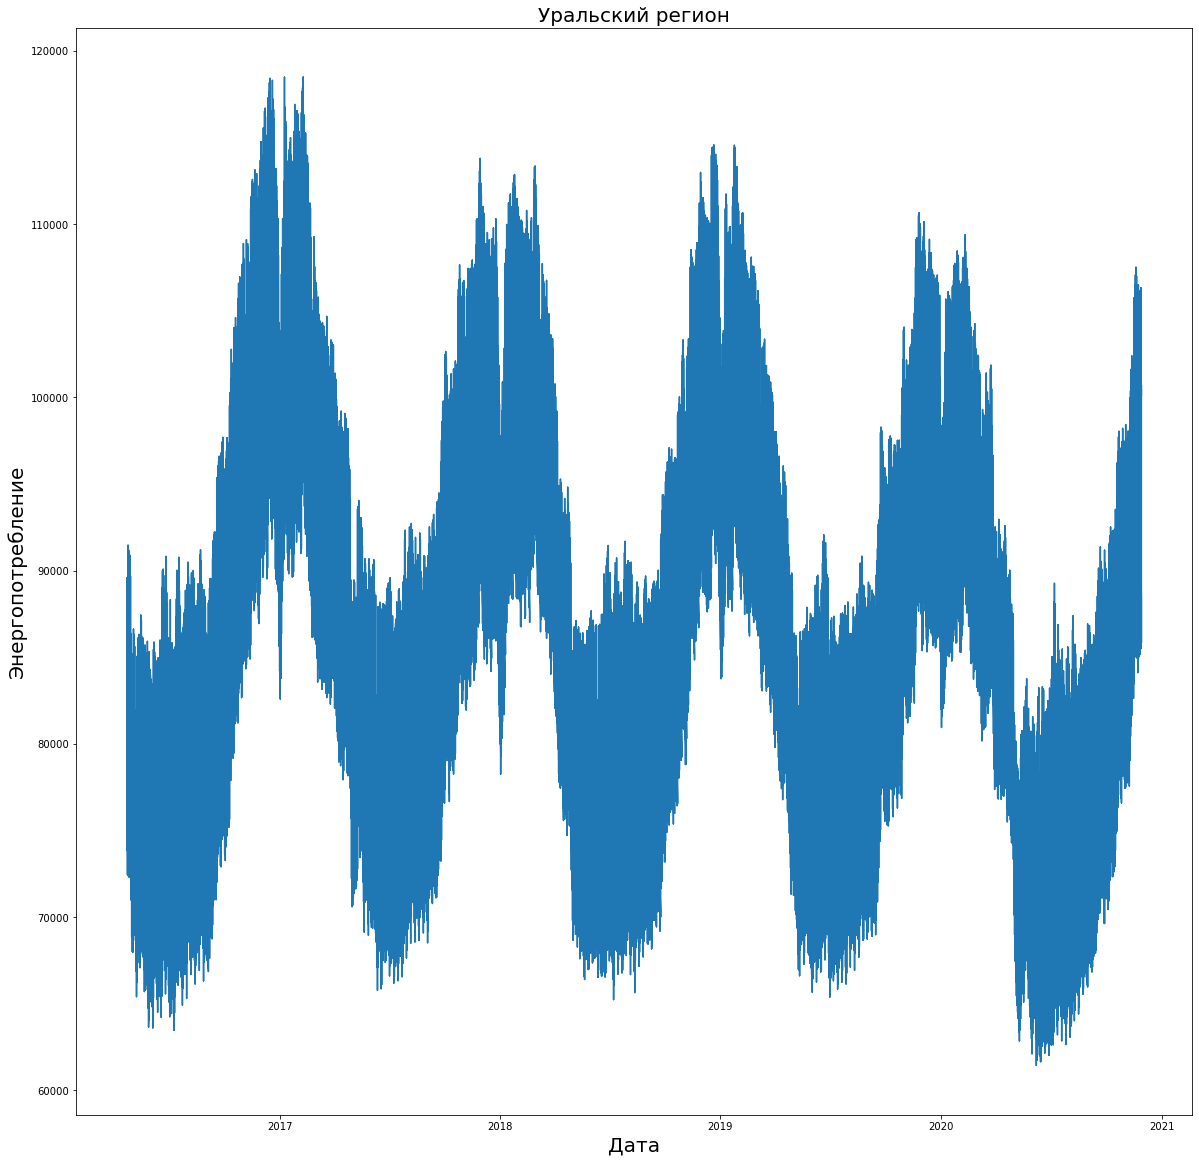

In [9]:
plt.figure(figsize=(20,20))

plt.ylabel('Энергопотребление', fontsize=20)
plt.xlabel('Дата', fontsize=20)
plt.title('Уральский регион', fontsize=20)
plt.savefig('ural_region.png')

plt.plot(dates, used_energy)
# plt.plot(dates, generated_energy_plan)

In [10]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from math import sqrt

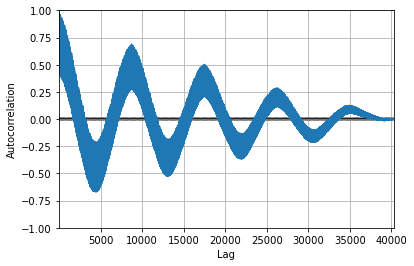

In [11]:
autocorrelation_plot(used_energy)
plt.show()

In [15]:
from datetime import datetime, timedelta

startDate = datetime.now()
endDate = datetime.now() + timedelta(days=3)

In [18]:
series = Series(used_energy)
 
X = series.values
X = X.astype('float32')

predict_num = (endDate - startDate).days
train, test = X[:-predict_num], X[-predict_num:]

history = [x for x in train]
predictions = list()

for i in range(predict_num):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    y_hat = model_fit.forecast()[0]
    predictions.append(y_hat)
    history.append(y_hat)
    print('%.0f> Predicted=%.3f' % (i, y_hat))

0> Predicted=100078.949
1> Predicted=98957.250
2> Predicted=97585.737


In [17]:
series = Series(used_energy) # Cut data
 
X = series.values
X = X.astype('float32')

train_size = int(len(X) * 0.99)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()

print(len(test))

fitted_model = None

for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    fitted_model = model_fit
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    obs = test[i] # observation
    history.append(obs)
    print('%.0f> Predicted=%.3f, Expected=%3.f' % (i, yhat, obs))

    
# report
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

403
0> Predicted=102919.901, Expected=101607
1> Predicted=101112.536, Expected=100593
2> Predicted=99287.051, Expected=97876
3> Predicted=95095.935, Expected=96320
4> Predicted=95390.943, Expected=92523
5> Predicted=88900.190, Expected=88473
6> Predicted=85105.584, Expected=85466
7> Predicted=83980.880, Expected=83321
8> Predicted=82185.826, Expected=82269
9> Predicted=82200.308, Expected=81681
10> Predicted=81800.323, Expected=81641
11> Predicted=82060.949, Expected=83721
12> Predicted=86355.542, Expected=87637
13> Predicted=91546.553, Expected=92920
14> Predicted=97525.077, Expected=96297
15> Predicted=98143.543, Expected=99312
16> Predicted=101120.870, Expected=100399
17> Predicted=100275.196, Expected=99940
18> Predicted=98381.669, Expected=99462
19> Predicted=98822.650, Expected=99347
20> Predicted=99199.147, Expected=99800
21> Predicted=100261.687, Expected=99823
22> Predicted=99722.662, Expected=100764
23> Predicted=101826.214, Expected=102390
24> Predicted=104012.048, Expected=

199> Predicted=87733.047, Expected=87688
200> Predicted=87065.955, Expected=86177
201> Predicted=85459.259, Expected=86137
202> Predicted=87013.275, Expected=86239
203> Predicted=86757.508, Expected=88086
204> Predicted=90264.563, Expected=92111
205> Predicted=96306.076, Expected=97306
206> Predicted=101758.371, Expected=101386
207> Predicted=104024.180, Expected=104741
208> Predicted=106760.115, Expected=106129
209> Predicted=106128.432, Expected=105932
210> Predicted=104607.645, Expected=105276
211> Predicted=104257.797, Expected=105289
212> Predicted=105302.344, Expected=105000
213> Predicted=104577.257, Expected=105236
214> Predicted=105562.723, Expected=105419
215> Predicted=105665.588, Expected=106996
216> Predicted=108698.443, Expected=106065
217> Predicted=104503.416, Expected=104933
218> Predicted=103711.527, Expected=102579
219> Predicted=100480.501, Expected=100515
220> Predicted=98790.609, Expected=97512
221> Predicted=95029.908, Expected=93041
222> Predicted=89040.393, Exp

395> Predicted=86539.458, Expected=86884
396> Predicted=88271.164, Expected=88811
397> Predicted=90801.875, Expected=91808
398> Predicted=94600.015, Expected=94694
399> Predicted=96884.536, Expected=98263
400> Predicted=101109.142, Expected=100215
401> Predicted=100984.279, Expected=100698
402> Predicted=100079.367, Expected=100493
RMSE: 1018.908


Посмотрим на данные

In [11]:
g_data = pd.read_csv("g_data.csv", encoding='Windows-1251', sep=';')
g_data.drop('ID', axis=1, inplace=True)

b_data = pd.read_csv("b_data.csv", encoding='Windows-1251', sep=';', header=0)
b_data.drop('ID', axis=1, inplace=True)

In [12]:
g_data.head(3)

,Name,NumberOfPersons,global_id,Year,Month,Unnamed: 6
0,Мария,252,37750254,2015,январь,NaN
1,Анастасия,224,37750255,2015,январь,NaN
2,Анна,190,37750256,2015,январь,NaN


In [14]:
b_data.head(3)

,Name,NumberOfPersons,global_id,Year,Month,Unnamed: 6
0,Александр,253,37750243,2015,январь,NaN
1,Михаил,247,37750244,2015,январь,NaN
2,Иван,226,37750245,2015,январь,NaN


In [15]:
from collections import Counter

def custom_func(names, letter_num=2):
    name_variants = []

    for name in names:
        if name == 'Name':
            continue
        if ',' in name:
            name_variants += list(map(lambda x: str(x).rstrip(), name.split(', ')))
            continue
        name_variants.append(name.lower())
        
    last_letters = list(map(lambda x: x[-letter_num:] , name_variants))
    last_letters_freequency = dict(Counter(last_letters))
    return last_letters_freequency

<BarContainer object of 62 artists>

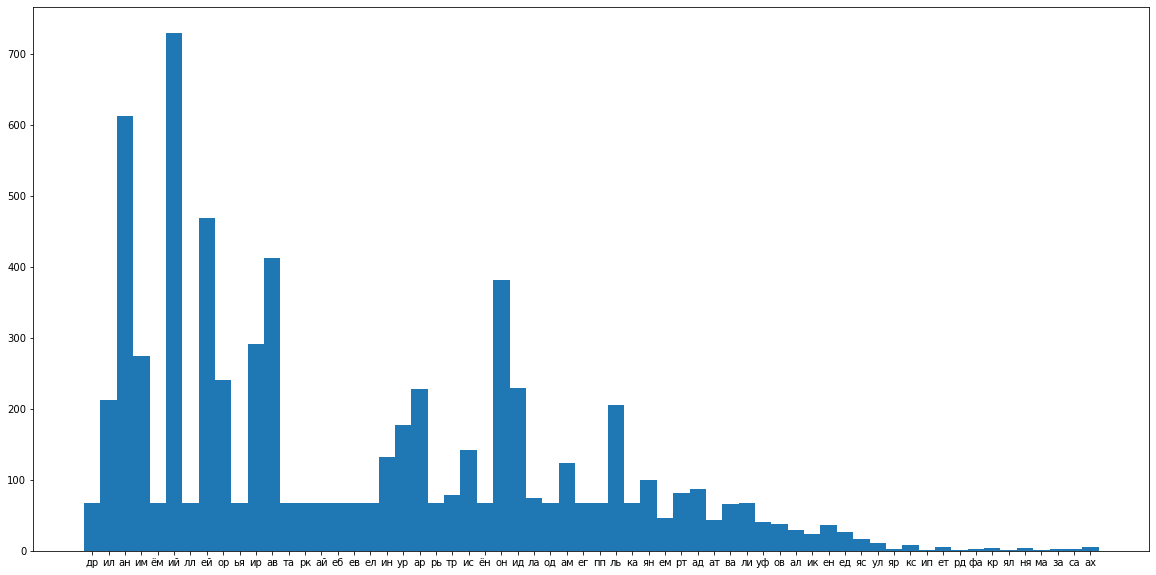

In [20]:
last_letters = custom_func(b_data['Name'], letter_num=2)
plt.figure(figsize=(20,10))
plt.bar(last_letters.keys(), last_letters.values(), width=1)

<BarContainer object of 37 artists>

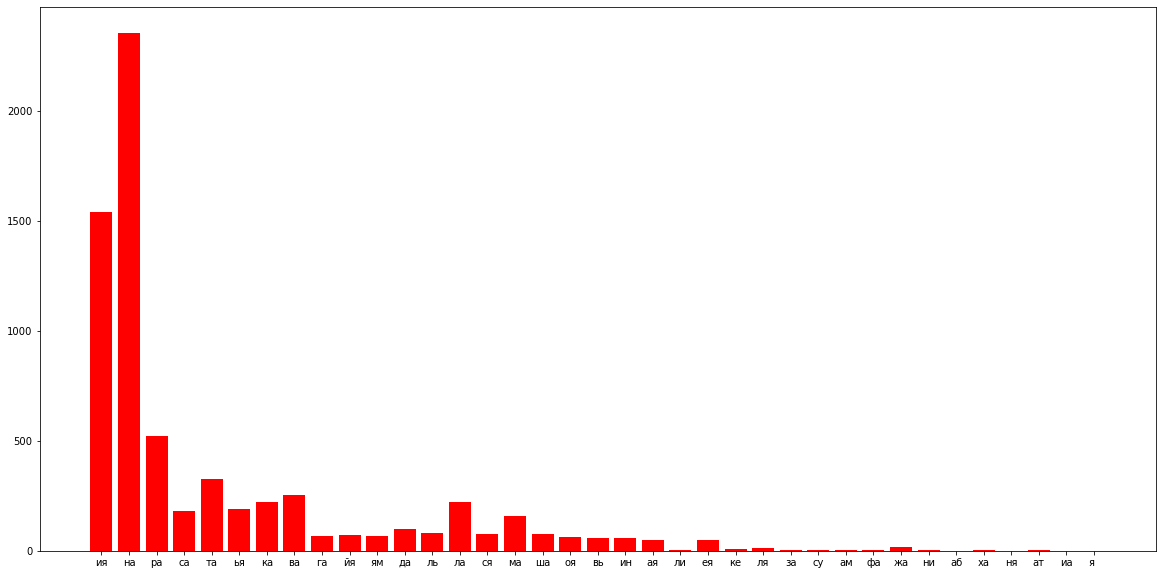

In [22]:
last_letters = custom_func(g_data['Name'], letter_num=2)
plt.figure(figsize=(20,10))
plt.bar(last_letters.keys(), last_letters.values(), color='red')

In [40]:
data = pd.read_csv('dataset.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   value     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [42]:
data.isna().any().sum(axis=0)

0

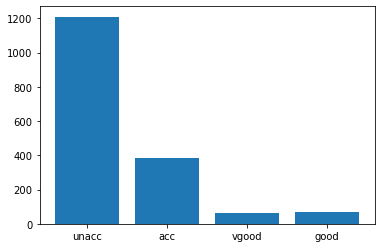

In [43]:
possible_values = data['value'].unique()
target = data['value'].copy()
target_count = list(map(lambda x: target[target == x].count(), possible_values))
plt.bar(possible_values, target_count)
plt.show()

In [44]:
y = data['value']
X = data.drop('value', axis=1)

In [45]:
label_class = {
    'acc': 0,
    'good': 1,
    'unacc': 2,
    'vgood': 3
}

y = y.map(label_class)

In [46]:
y.tail()

1723    1
1724    3
1725    2
1726    1
1727    3
Name: value, dtype: int64

In [47]:
X.head(3)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,two,two,small,low
1,vhigh,vhigh,two,two,small,med
2,vhigh,vhigh,two,two,small,high


In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe_features = ohe.fit_transform(X)

column_names = []
for column in X.columns:
    values = set(X[column])
    column_names += list(map(lambda x: f"{column}_{x}", values))

X = pd.DataFrame(ohe_features, columns=column_names)

In [49]:
X.head(3)

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_four,doors_two,...,doors_5more,persons_four,persons_two,persons_more,lug_boot_small,lug_boot_med,lug_boot_big,safety_high,safety_med,safety_low
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=2000, n_jobs=-1, multi_class='multinomial')

In [52]:
from sklearn.model_selection import cross_val_score

errors = cross_val_score(reg, X_train, y_train, scoring='precision_macro')
avg_error = np.average(errors)
avg_error

0.8130437045103077

In [53]:
def get_dataset_balance_weigts(X, y, logging=False):
    classes = set(y)
    dataset_len = len(y)
    
    weigths = dict()
    
    for _class in classes:
        class_weigth = dataset_len / len(y[y==_class])
        weigths[_class] = class_weigth
        
        if logging:
            print(f"class: {_class}, quantity: {len(y[y==_class])}, weigth: {class_weigth}")
    
    return weigths

In [54]:
get_dataset_balance_weigts(X, y, True)

class: 0, quantity: 384, weigth: 4.5
class: 1, quantity: 69, weigth: 25.043478260869566
class: 2, quantity: 1210, weigth: 1.428099173553719
class: 3, quantity: 65, weigth: 26.584615384615386


{0: 4.5, 1: 25.043478260869566, 2: 1.428099173553719, 3: 26.584615384615386}

In [55]:
def warn(*args, **kwargs):
    pass
import warnings 
warnings.warn = warn  # спрячем ошибки от sklearn (когда penalty не подходит для solver)

In [56]:
def iter_reg_hyperparams(logging=True):
    iter_num = 0
    _best = 0

    
    C = np.arange(0.1, 1.3, 0.2) # smaller values specify stronger regularization
    intercept_scaling = np.arange(0.1, 1.3, 0.2) # to lessen the effect of regularization
    fit_intercept = (True, False) # bias
    penalty = ('l1', 'l2', 'elasticnet', 'none')

    solvers = ('newton-cg', 'sag', 'saga', 'lbfgs') # multiclass solvers
    class_weight = get_dataset_balance_weigts(X, y)
    
    
    for _c in C:
        for _scaling in intercept_scaling:
            for _penalty in penalty:
                for _intercept in fit_intercept:
                    for _solver in solvers:
                        reg = LogisticRegression(penalty=_penalty, C=_c, fit_intercept=_intercept,
                                                 intercept_scaling=_intercept, class_weight=class_weight,
                                                 random_state=42, solver=_solver, max_iter=2000)

                        _precisions = cross_val_score(reg, X, y, scoring='precision_micro')
                        avg_precision = np.average(_precisions)

                        if avg_precision > _best:
                            _best = avg_precision
                            _best_reg = reg

                        iter_num += 1
                        if not np.isnan(avg_precision) and logging:
                            print(f'{iter_num}. {avg_precision}.  BEST: {_best}')
    
    return _best_reg

Лучшие параметры: {'C': 0.1,
 'class_weight': {0: 4.5,
  1: 25.043478260869566,
  2: 1.428099173553719,
  3: 26.584615384615386},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': True,
 'l1_ratio': None,
 'max_iter': 2000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
best_reg = LogisticRegression(max_iter=2000, n_jobs=-1, C=0.1,
                              class_weight={0: 4.5, 1: 25.043478260869566, 2: 1.428099173553719, 3: 26.584615384615386},
                              dual=False, fit_intercept=True, intercept_scaling=True, 
                              l1_ratio=None, penalty='none', random_state=42, solver='newton-cg',
                              tol=0.0001, verbose=0, warm_start=False)

In [67]:
accuracy = cross_val_score(best_reg, X, y, scoring='accuracy')
accuracy = np.average(accuracy)
accuracy

0.8992544190332579

In [68]:
unbalanced_reg = LogisticRegression(penalty='none', C=0.1, fit_intercept=True,
                                                 intercept_scaling=True, solver='newton-cg', max_iter=2000)

accuracy = cross_val_score(unbalanced_reg, X, y, scoring='accuracy')
accuracy = np.average(accuracy)
accuracy

0.8929010639189074

In [69]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical 

In [70]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [71]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=21))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', 
              loss='mse', 
              metrics=['accuracy', 'mse', 'mae', 'mape'])

In [72]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.7711 - mse: 0.0873 - mae: 0.1908 - mape: 95376088.0000
Epoch 2/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.8958 - mse: 0.0409 - mae: 0.0987 - mape: 49346036.0000
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9435 - mse: 0.0228 - mae: 0.0636 - mape: 31794788.0000
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9837 - mse: 0.0107 - mae: 0.0380 - mape: 18983082.0000
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9939 - mse: 0.0052 - mae: 0.0240 - mape: 11976968.0000
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9973 - mse: 0.0025 - mae: 0.0152 - mape: 7611494.5000
Epoch 7/20
46/46 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - mse: 0.0010 -

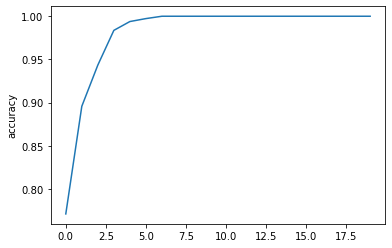

In [73]:
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])

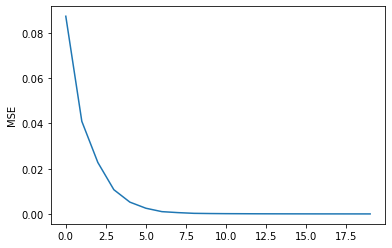

In [74]:
plt.ylabel('MSE')
plt.plot(history.history['mse'])

In [76]:
y_pred = model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Validate {} %'.format(scores[1] * 100))

Validate 100.0 %
